<a href="https://colab.research.google.com/github/HS587885/Paper_review/blob/main/HowToUseModin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Modin이란 무엇인가?

## MODIN 설치

In [ ]:
!pip install modin[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 956 kB 5.1 MB/s 
     |████████████████████████████████| 761 kB 37.0 MB/s 
     |████████████████████████████████| 1.8 MB 34.3 MB/s 
     |████████████████████████████████| 132 kB 37.0 MB/s 
     |████████████████████████████████| 59.4 MB 1.4 MB/s 
     |████████████████████████████████| 68 kB 6.5 MB/s 
     |████████████████████████████████| 117 kB 57.3 MB/s 
     |████████████████████████████████| 9.9 MB 35.9 MB/s 
     |████████████████████████████████| 1.6 MB 46.3 MB/s 
     |████████████████████████████████| 120 kB 43.9 MB/s 
     |████████████████████████████████| 59 kB 4.4 MB/s 
     |████████████████████████████████| 423 kB 41.7 MB/s 
     |████████████████████████████████| 4.1 MB 33.2 MB/s 
     |████████████████████████████████| 8.8 MB 29.4 MB/s 
     |████████████████████████████████| 128 kB 43.8 MB/s 
     |██████████████████████████████

Modin은 Ray나 Daskd와 같은 병렬 프로그래밍 엔진을 이용하여 Pandas의 처리 속도를 쉽게 향상해주는 라이브러리이며 Pandas와의 통합과 호환이 수월하다

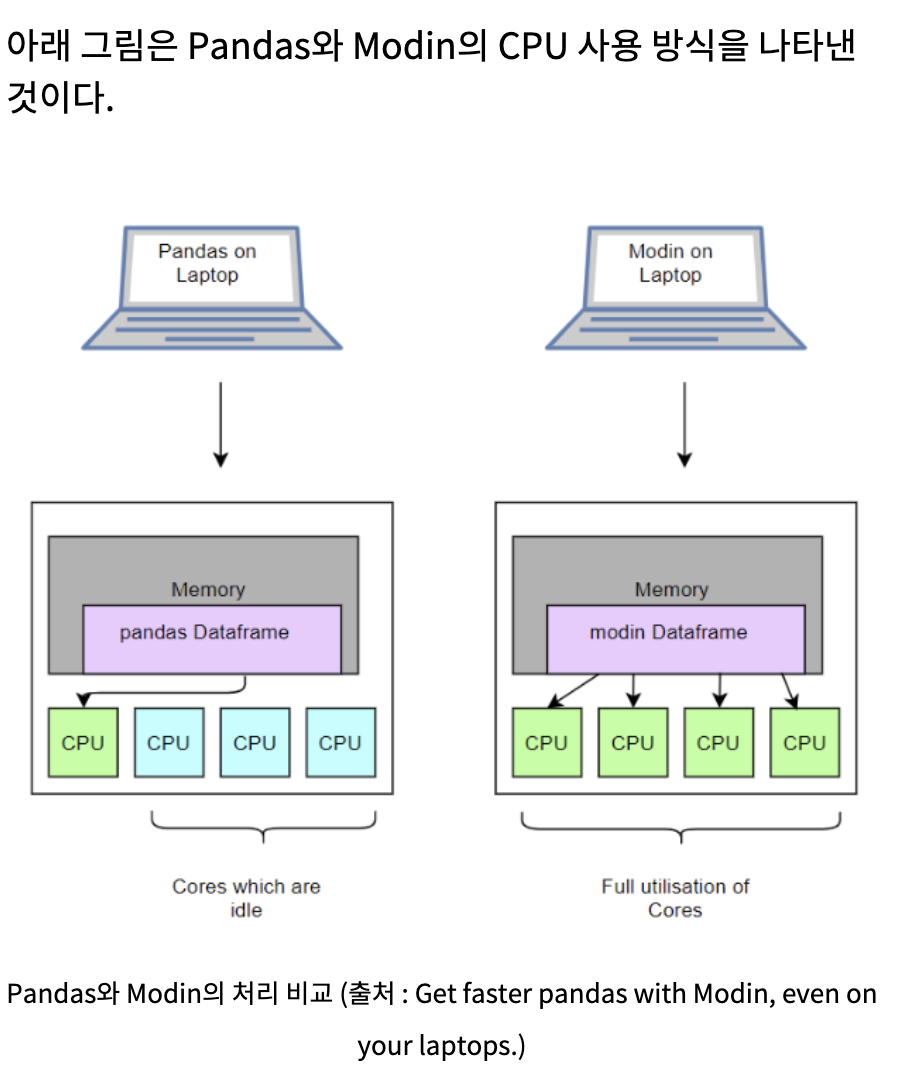

Pandas는 PC에 여러 코어가 있다고 하더라도 하나의 코어만 사용하고 나머지 코어는 놀고 있지만 Modin은 여러 코어를 사용하여 처리 속도가 빠르다고 한다

# 모듈 Import

In [ ]:
import modin.pandas as mpd
import pandas as pd
import time
import ray
ray.init() #병렬 

Pandas와 Modin의 속도 차이를 비교하기에 앞서 120MB 되는 데이터를 이용했다.
이 데이터는 아래의 링크에서 다운가능하다.

https://modin-test.s3.us-west-1.amazonaws.com/yellow_tripdata_2015-01.csv

먼저 모딘과 판다스 그리고 기타 필요한 모듈을 임포트를 했고, 이때 병렬 엔진은 ray를 선택했다. ray,init()을 통해 Ray 드라이버를 실행한다. 드라이버 실행한다는 뜻은 병렬 처리를 위한 클러스터를 만들어 주는 것이다.

## 1) Read_csv

### Pandas의 Read_csv 속도

In [9]:
start = time.time()
pandas_df = pd.read_csv('/content/drive/MyDrive/data/yellow_tripdata_2015-01.csv', parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"], quoting=3)
end = time.time()
pandas_duration = end - start
print("Time to read with pandas: {} seconds".format(round(pandas_duration, 3)))

Time to read with pandas: 6.098 seconds


### Modin의 Read_csv 속도

In [10]:
start = time.time()
modin_df = mpd.read_csv('/content/drive/MyDrive/data/yellow_tripdata_2015-01.csv', parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"], quoting=3)
end = time.time()
modin_duration = end - start
print("Time to read with Modin: {} seconds".format(round(modin_duration, 3)))
print("Modin is {}x faster than pandas at `read_csv`!".format(round(pandas_duration / modin_duration, 2)))


Time to read with Modin: 4.676 seconds
Modin is 1.3x faster than pandas at `read_csv`!


## 2) concat

### Pandas concat 속도

In [11]:
start = time.time()
big_pandas_df = pd.concat([pandas_df for _ in range(25)])
end = time.time()
pandas_duration = end - start
print("Time to concat with pandas: {} seconds".format(round(pandas_duration, 3)))

Time to concat with pandas: 11.56 seconds


### Modin concat 속도

In [12]:
start = time.time()
big_modin_df = mpd.concat([modin_df for _ in range(25)])
end = time.time()
modin_duration = end - start
print("Time to concat with Modin: {} seconds".format(round(modin_duration, 3)))
print("Modin is {}x faster than pandas at `concat`!".format(round(pandas_duration / modin_duration, 2)))


Time to concat with Modin: 0.093 seconds
Modin is 124.08x faster than pandas at `concat`!


## 3) apply


### Pandas apply

In [13]:
start = time.time()
rounded_trip_distance_pandas = big_pandas_df["trip_distance"].apply(round)
 
end = time.time()
pandas_duration = end - start
print("Time to apply with pandas: {} seconds".format(round(pandas_duration, 3)))


Time to apply with pandas: 16.689 seconds


### Modin apply

In [14]:
start = time.time()
rounded_trip_distance_modin = big_modin_df["trip_distance"].apply(round)
 
end = time.time()
modin_duration = end - start
print("Time to apply with Modin: {} seconds".format(round(modin_duration, 3)))
print("Modin is {}x faster than pandas at `apply` on one column!".format(round(pandas_duration / modin_duration, 2)))


Time to apply with Modin: 0.416 seconds
Modin is 40.09x faster than pandas at `apply` on one column!


## 4) 결론

Modin이 처리속도가 훨씬 빠른데 소모하는 램은 크기는 더 큰거 같다

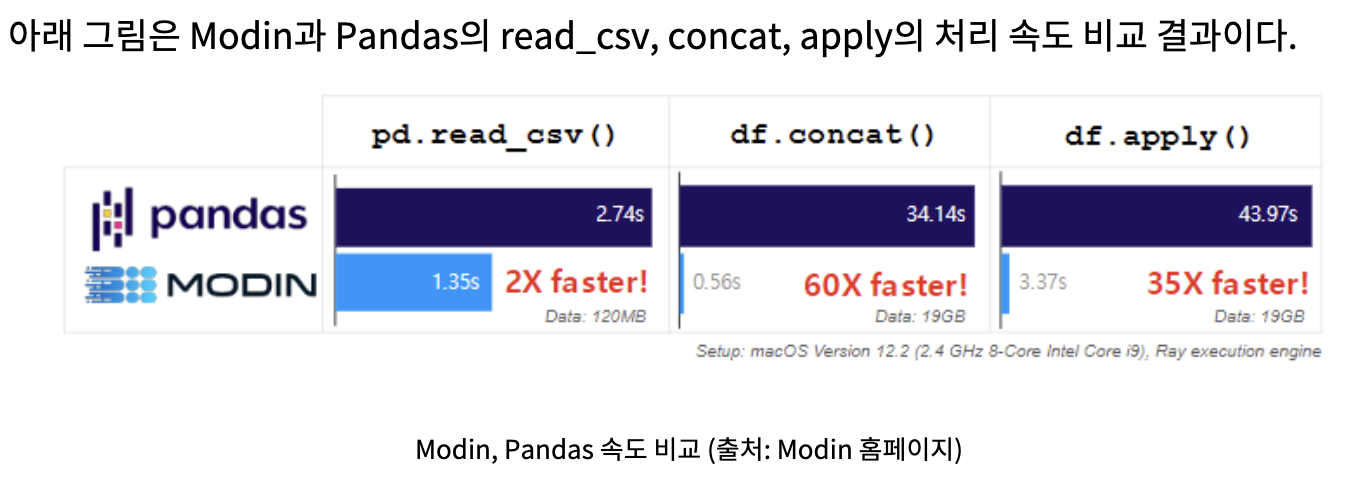

## 참고자료

https://zephyrus1111.tistory.com/170